# Report 

## First: Web scraping steps.

### 1- Import URL & use driver to get the page.


In [3]:
url = "https://coinmarketcap.com/currencies/solana/historical-data/"


In [4]:

driver = webdriver.Chrome(r'C:\Users\sshah\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe')


In [5]:
driver.get(url)

### 2- Use Selenium to click on the buttuns & beautifulsoup to find rows by the tags.

In [27]:
data_find= driver.find_element_by_xpath('//*[@id="__next"]/div/div[1]/div[2]/div/div[3]/div/div/div[2]')

In [28]:
page = data_find.get_attribute('innerHTML')

In [49]:
buttun1 = driver.find_element_by_xpath('//*[@id="__next"]/div/div[1]/div[2]/div/div[3]/div/div/p[1]/button')
buttun1.click()

In [47]:
soup=BeautifulSoup(page, 'html5lib')

In [50]:
rows = soup.find_all('tr')
rows

[<tr><th class="stickyTop" style="text-align: left; top: 64px;">Date</th><th class="stickyTop" style="top: 64px;">Open*</th><th class="stickyTop" style="top: 64px;">High</th><th class="stickyTop" style="top: 64px;">Low</th><th class="stickyTop" style="top: 64px;">Close**</th><th class="stickyTop" style="top: 64px;">Volume</th><th class="stickyTop" style="text-align: right; top: 64px;">Market Cap</th></tr>,
 <tr><td style="text-align: left;">Oct 18, 2021</td><td>$160.00</td><td>$162.86</td><td>$155.03</td><td>$157.23</td><td>$1,698,878,759</td><td style="text-align: right;">$47,254,003,672</td></tr>,
 <tr><td style="text-align: left;">Oct 17, 2021</td><td>$157.46</td><td>$167.43</td><td>$154.09</td><td>$159.74</td><td>$2,168,838,138</td><td style="text-align: right;">$47,991,515,200</td></tr>,
 <tr><td style="text-align: left;">Oct 16, 2021</td><td>$163.01</td><td>$164.71</td><td>$156.74</td><td>$157.54</td><td>$1,531,502,795</td><td style="text-align: right;">$47,304,541,727</td></tr>,

In [53]:
all_rows = []
for r in rows:
    row = []
    for c in r:
        row.append(c.text)
    all_rows.append(row)    

### 3- Convert the rows into a pandas dataframe.

In [929]:
df = pd.DataFrame (all_rows, columns = ['Date', 'Open*', 'High', 'Low', 'Close**', 'Volume', 'Market Cap'])

In [930]:
df

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,Date,Open*,High,Low,Close**,Volume,Market Cap
1,"Oct 18, 2021",$160.00,$162.86,$155.03,$157.23,"$1,698,878,759","$47,254,003,672"
2,"Oct 17, 2021",$157.46,$167.43,$154.09,$159.74,"$2,168,838,138","$47,991,515,200"
3,"Oct 16, 2021",$163.01,$164.71,$156.74,$157.54,"$1,531,502,795","$47,304,541,727"
4,"Oct 15, 2021",$150.05,$165.12,$146.98,$162.60,"$3,970,589,003","$48,823,235,028"
...,...,...,...,...,...,...,...
118,"Jun 23, 2021",$26.91,$32.77,$25.70,$30.05,"$1,111,302,687","$8,192,451,330"
119,"Jun 22, 2021",$26.59,$28.71,$20.38,$26.77,"$1,258,580,061","$7,299,009,873"
120,"Jun 21, 2021",$35.26,$35.50,$25.95,$26.66,"$760,344,541","$7,267,805,028"
121,"Jun 20, 2021",$35.24,$35.93,$31.36,$35.32,"$452,587,531","$9,630,102,394"


## Second: Data Cleaning, EDA and Data engineering.

### 1- remove the symbols

In [931]:
df["Market Cap"].replace('$','', inplace= True)

In [932]:
df['MarkerCap']=df['Market Cap'].apply(lambda x: x[1:].replace(',', ''))
df.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap,MarkerCap
0,Date,Open*,High,Low,Close**,Volume,Market Cap,arket Cap
1,"Oct 18, 2021",$160.00,$162.86,$155.03,$157.23,"$1,698,878,759","$47,254,003,672",47254003672
2,"Oct 17, 2021",$157.46,$167.43,$154.09,$159.74,"$2,168,838,138","$47,991,515,200",47991515200
3,"Oct 16, 2021",$163.01,$164.71,$156.74,$157.54,"$1,531,502,795","$47,304,541,727",47304541727
4,"Oct 15, 2021",$150.05,$165.12,$146.98,$162.60,"$3,970,589,003","$48,823,235,028",48823235028


In [933]:
df["Volume"].replace('$','', inplace= True)
df['VOLUME']=df['Volume'].apply(lambda x: x[1:].replace(',', ''))


In [934]:
df.drop(['Market Cap','Volume'],
  axis='columns', inplace=True)

In [935]:
df["Close**"].replace('$','', inplace= True)
df['CLOSE']=df['Close**'].apply(lambda x: x[1:].replace(',', ''))

In [936]:
df["Low"].replace('$','', inplace= True)
df['LOW']=df['Low'].apply(lambda x: x[1:].replace(',', ''))
df["High"].replace('$','', inplace= True)
df['HIGH']=df['High'].apply(lambda x: x[1:].replace(',', ''))
df["Open*"].replace('$','', inplace= True)
df['OPEN']=df['Open*'].apply(lambda x: x[1:].replace(',', ''))

In [937]:
df.drop(['High','Low','Close**','Open*'],
  axis='columns', inplace=True)

### 2- remove duplicates

In [939]:
df.drop([0],inplace=True)

In [940]:
df

,Date,MarkerCap,VOLUME,CLOSE,LOW,HIGH,OPEN
1,"Oct 18, 2021",47254003672,1698878759,157.23,155.03,162.86,160.00
2,"Oct 17, 2021",47991515200,2168838138,159.74,154.09,167.43,157.46
3,"Oct 16, 2021",47304541727,1531502795,157.54,156.74,164.71,163.01
4,"Oct 15, 2021",48823235028,3970589003,162.60,146.98,165.12,150.05
5,"Oct 14, 2021",44950465986,1948101208,149.76,147.33,155.33,148.02
...,...,...,...,...,...,...,...
118,"Jun 23, 2021",8192451330,1111302687,30.05,25.70,32.77,26.91
119,"Jun 22, 2021",7299009873,1258580061,26.77,20.38,28.71,26.59
120,"Jun 21, 2021",7267805028,760344541,26.66,25.95,35.50,35.26
121,"Jun 20, 2021",9630102394,452587531,35.32,31.36,35.93,35.24


### 3- Convert the type of Date column into a datetime type.

In [942]:
nDate=[]
for s in df.Date:
    d = datetime.strptime(s, '%b %d, %Y')
    nDate.append(d.strftime('%Y-%m-%d'))
    print(d.strftime('%Y-%m-%d'))

2021-10-18
2021-10-17
2021-10-16
2021-10-15
2021-10-14
2021-10-13
2021-10-12
2021-10-11
2021-10-10
2021-10-09
2021-10-08
2021-10-07
2021-10-06
2021-10-05
2021-10-04
2021-10-03
2021-10-02
2021-10-01
2021-09-30
2021-09-29
2021-09-28
2021-09-27
2021-09-26
2021-09-25
2021-09-24
2021-09-23
2021-09-22
2021-09-21
2021-09-20
2021-09-19
2021-09-18
2021-09-17
2021-09-16
2021-09-15
2021-09-14
2021-09-13
2021-09-12
2021-09-11
2021-09-10
2021-09-09
2021-09-08
2021-09-07
2021-09-06
2021-09-05
2021-09-04
2021-09-03
2021-09-02
2021-09-01
2021-08-31
2021-08-30
2021-08-29
2021-08-28
2021-08-27
2021-08-26
2021-08-25
2021-08-24
2021-08-23
2021-08-22
2021-08-21
2021-08-20
2021-08-19
2021-08-18
2021-08-17
2021-08-16
2021-08-15
2021-08-14
2021-08-13
2021-08-12
2021-08-11
2021-08-10
2021-08-09
2021-08-08
2021-08-07
2021-08-06
2021-08-05
2021-08-04
2021-08-03
2021-08-02
2021-08-01
2021-07-31
2021-07-30
2021-07-29
2021-07-28
2021-07-27
2021-07-26
2021-07-25
2021-07-24
2021-07-23
2021-07-22
2021-07-21
2021-07-20

In [943]:
df['DATE']= nDate

In [945]:
df.drop(['Date'], axis=1,inplace=True)

In [949]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')


### 4- Convert the types of all other columns into a float.

In [948]:
df.dtypes

MarkerCap    object
VOLUME       object
CLOSE        object
LOW          object
HIGH         object
OPEN         object
DATE         object
dtype: object

In [950]:
df.head()

,MarkerCap,VOLUME,CLOSE,LOW,HIGH,OPEN,DATE
1,47254003672,1698878759,157.23,155.03,162.86,160.00,2021-10-18
2,47991515200,2168838138,159.74,154.09,167.43,157.46,2021-10-17
3,47304541727,1531502795,157.54,156.74,164.71,163.01,2021-10-16
4,48823235028,3970589003,162.60,146.98,165.12,150.05,2021-10-15
5,44950465986,1948101208,149.76,147.33,155.33,148.02,2021-10-14


In [951]:
df = df.astype({"CLOSE": float,"LOW": float ,"HIGH": float ,"OPEN": float, "MarkerCap": float , "VOLUME": float})

In [952]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 1 to 122
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MarkerCap  122 non-null    float64       
 1   VOLUME     122 non-null    float64       
 2   CLOSE      122 non-null    float64       
 3   LOW        122 non-null    float64       
 4   HIGH       122 non-null    float64       
 5   OPEN       122 non-null    float64       
 6   DATE       122 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 7.6 KB


### 5- np.log for ( 'MarkerCap' ) and  ( 'VOLUME' ) columns.

In [953]:
df['nMarketCap'] = np.log(df['MarkerCap'])
df['nVOLUME'] = np.log(df['VOLUME'])
df.drop(['MarkerCap'], axis=1,inplace=True)
df.drop(['VOLUME'], axis=1,inplace=True)

In [954]:
df

,CLOSE,LOW,HIGH,OPEN,DATE,nMarketCap,nVOLUME
1,157.23,155.03,162.86,160.00,2021-10-18,24.578803,21.253234
2,159.74,154.09,167.43,157.46,2021-10-17,24.594290,21.497457
3,157.54,156.74,164.71,163.01,2021-10-16,24.579872,21.149515
4,162.60,146.98,165.12,150.05,2021-10-15,24.611472,22.102180
5,149.76,147.33,155.33,148.02,2021-10-14,24.528827,21.390121
...,...,...,...,...,...,...,...
118,30.05,25.70,32.77,26.91,2021-06-23,22.826479,20.828799
119,26.77,20.38,28.71,26.59,2021-06-22,22.711005,20.953250
120,26.66,25.95,35.50,35.26,2021-06-21,22.706720,20.449282
121,35.32,31.36,35.93,35.24,2021-06-20,22.988160,19.930492


In [828]:
df.drop(['MarkerCap'], axis=1,inplace=True)
df.drop(['VOLUME'], axis=1,inplace=True)

### 6- Rearrange the datafame date by weeks.

In [829]:
weekly_df= df.resample('W', on ='DATE').mean()


In [830]:
weekly_df

,CLOSE,LOW,HIGH,OPEN,nMarketCap,nVOLUME
DATE,,,,,,
2021-06-20,35.335000,33.170000,36.640000,36.030000,22.988604,19.662188
2021-06-27,29.285714,26.371429,32.115714,29.877143,22.798656,20.420494
2021-07-04,34.081429,32.300000,35.207143,33.741429,22.952126,19.875457
2021-07-11,33.467143,32.377143,35.062857,33.757143,22.933317,19.665642
2021-07-18,28.505714,27.592857,30.217143,29.291429,22.771665,19.433213
2021-07-25,26.805714,25.148571,27.761429,26.595714,22.709649,19.779657
2021-08-01,31.278571,29.245714,32.470000,30.397143,22.861405,20.015070
2021-08-08,36.694286,34.931429,38.147143,36.225714,23.024316,19.976834
2021-08-15,43.571429,40.260000,44.742857,41.257143,23.225072,20.103577


<Figure size 720x720 with 0 Axes>

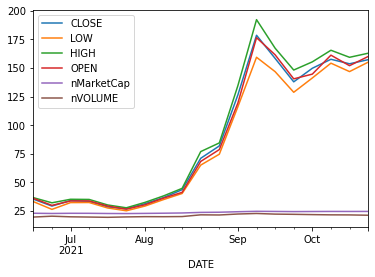

In [976]:
plt.figure(figsize=(10,10))
weekly_df.plot();


In [947]:
df.describe()

,MarkerCap,VOLUME,CLOSE,LOW,HIGH,OPEN,DATE
count,122,122,122,122,122,122,122
unique,122,122,120,120,121,121,122
top,8100836463,471854279,31.28,30.07,35.50,26.67,2021-09-05
freq,1,1,2,2,2,2,1


# Third: ARIMA(p,d,q).

### 1- Autocorrelation function (ACF).

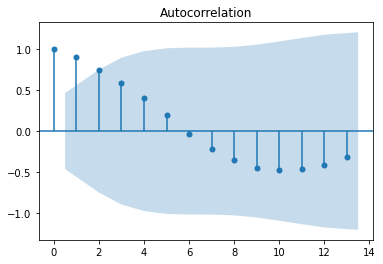

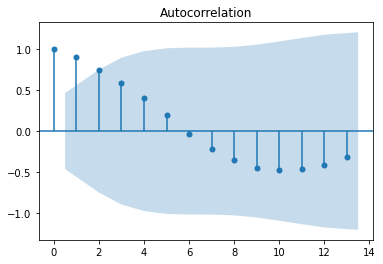

In [842]:
x= weekly_df.filter(['nMarketCap'],axis=1)
x.drop(x.tail(1).index,inplace=True
plot_acf(x)

### 2- split the data.


In [838]:
x= weekly_df.filter(['nMarketCap'],axis=1)
train = x[0:12]
test= x[12:]

In [840]:
x

,nMarketCap
DATE,
2021-06-20,22.988604
2021-06-27,22.798656
2021-07-04,22.952126
2021-07-11,22.933317
2021-07-18,22.771665
2021-07-25,22.709649
2021-08-01,22.861405
2021-08-08,23.024316
2021-08-15,23.225072


### 3- Collect parameters and train/fit them.

In [843]:
p=q= range(0,7)
d=range(1,3)
pdq= list(itertools.product(p,d,q))
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 2, 5),
 (2, 2, 6),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 2, 4),
 (3, 2, 5),
 (3, 2, 6),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 2, 0),
 (4, 2, 1),
 (4, 2, 2),
 (4, 2, 3),
 (4, 2, 4),
 (4, 2, 5),
 (4, 2, 6),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 2, 0),
 (5, 2, 1),
 (5, 2, 2),
 (5, 2, 3),
 (5, 2, 4),
 (5, 2, 5),
 (5,

In [848]:
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        arima_model= ARIMA(train, order=param)
        arima_model_fit = arima_model.fit()
        predictions = arima_model_fit.forecast(steps= 6)[0]
        predictions= pd.Series(predictions)
        print( param,f'AIC score  {arima_model_fit.aic}', f'MAE score  {np.mean(np.abs(test.values-predictions.values))}')
    except:
        continue

(0, 1, 0) AIC score  1.034454568498095 MAE score  0.23715581916827747
(0, 1, 1) AIC score  2.452191599839715 MAE score  0.2829520538793745
(0, 1, 2) AIC score  1.6377112000037002 MAE score  0.42002567978206407
(0, 1, 3) AIC score  2.5608149414368384 MAE score  0.38864783253830854
(0, 1, 4) AIC score  4.9436277197310545 MAE score  0.7145732029701998
(0, 2, 0) AIC score  2.2695834901955134 MAE score  1.8918604413017155
(0, 2, 1) AIC score  -2.3243832413030674 MAE score  1.552793030117795
(0, 2, 2) AIC score  -0.7086227840312915 MAE score  1.52834080853946
(0, 2, 3) AIC score  0.41776440266239945 MAE score  1.5754591563663287
(1, 1, 0) AIC score  1.910492155425942 MAE score  0.3715153909186903
(1, 2, 0) AIC score  0.8958101700660492 MAE score  1.3426637044680199
(2, 1, 0) AIC score  2.355847158987622 MAE score  0.5030365408266051
(2, 2, 0) AIC score  1.1143952517700768 MAE score  1.6139028882551
(3, 1, 0) AIC score  4.301779727228656 MAE score  0.5691860087016045
(3, 2, 0) AIC score  2.81

### 4- Determine the best parameter for your model depending on AIC and MAE scores.

### After fitting multiple parameters we found out that the best ARIMA model for our data is ARIMA(0,1,0) 
### with AIC score = 1.034454568498095 and MAE score = 0.23715581916827747

In [906]:
arima_model= ARIMA(train, order= (0,1,0))
arima_model_fit = arima_model.fit()

In [977]:
predictions = arima_model_fit.forecast(steps= 6)[0]
predictions= pd.Series(predictions)


In [909]:
test_pre1= test.copy()
test_pre1['predictions']= predictions.values
test_pre1

,nMarketCap,predictions
DATE,,
2021-09-12,24.679078,24.443764
2021-09-19,24.570436,24.565027
2021-09-26,24.434312,24.686290
2021-10-03,24.514379,24.807553
2021-10-10,24.573918,24.928817
2021-10-17,24.553381,25.050080


In [912]:
frames = [train.copy(),test_pre1.copy()]

result = pd.concat(frames)
result

,nMarketCap,predictions
DATE,,
2021-06-20,22.988604,NaN
2021-06-27,22.798656,NaN
2021-07-04,22.952126,NaN
2021-07-11,22.933317,NaN
2021-07-18,22.771665,NaN
2021-07-25,22.709649,NaN
2021-08-01,22.861405,NaN
2021-08-08,23.024316,NaN
2021-08-15,23.225072,NaN


([<matplotlib.axis.YTick at 0x2ab7c5590a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

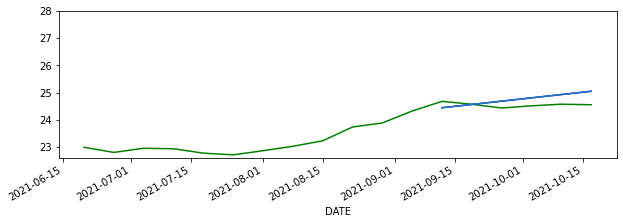

In [975]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(result.nMarketCap, color='green')
plt.plot(result.iloc[12:, 1], color='blue')
(result.iloc[12:, 1]).plot()
plt.yticks(range(23,29))